In [3]:
import numpy as np
from pytz import timezone
from datetime import datetime
import matplotlib.pyplot as plt

TZ = timezone('Europe/Moscow')

from env_find_path import FindPath

step_reward = []
area_size = 400
option = {'start_radius': 20}

env = FindPath(render_mode = 'human', target_point_rand=False, area_size=area_size, observation_render=True, options=option )
seed = int( datetime.now(TZ).strftime("%H%M%S") )
print(seed)
env.action_space.seed(seed)

total_reward = 0.

observation, info = env.reset(seed=seed)

for tick in range(1800):

    action = env.teach_action()
    #action = np.array([1,0.2,0.])
    #if tick > 100:
    #    action = env.teach_action()

    #action = 4
    #if observation[3] < 0.5:
    #    action = 1
    #else:
    #    action = 2

    observation, reward, terminated, truncated, info = env.step(action)

    #for y in range(area_size):
    #    line = observation[y*area_size:(y+1)*area_size]
    #    print(line)
    #print('------------')

    if terminated or truncated:
        observation, info = env.reset()
        step_reward.append(reward)
        total_reward += reward
        print('BREAK', tick, terminated, truncated)
        break
    
    step_reward.append(reward)
    total_reward += reward


print(len(step_reward))
print(total_reward)

114909
BREAK 24 True False
25
42.0


In [3]:
step_reward

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 9.0]

In [4]:
env.close()

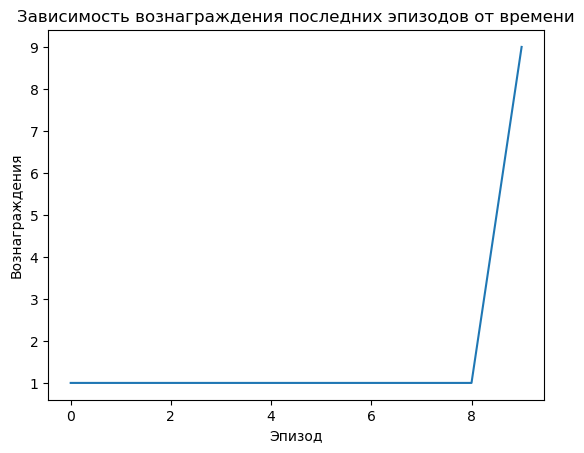

In [5]:
plt.plot(step_reward)
plt.title('Зависимость вознаграждения последних эпизодов от времени')
plt.xlabel('Эпизод')
plt.ylabel('Вознаграждения')
plt.show()

In [6]:
from gymnasium.spaces import Box
import numpy as np

observation_space_local = Box(low=0,high=1)
max_size = 5

In [7]:
observation_space_local = Box(
    low = -10,
    high = 1000,
    dtype = np.int16,
    shape = (25,)
)
observation_space_local

Box(-10, 1000, (25,), int16)

In [8]:

observation_space_local.sample()

array([787, 450, 398, 245, 709, 989, 603, 694,  46, 412, 634, 198, 746,
       496, 414, 243, 552, 651, 956, 264, 824,  -8, 517, 737, 599],
      dtype=int16)

In [9]:
observation_space_local

Box(-10, 1000, (25,), int16)

In [10]:
observation_space = Box(low=np.array([-10,-10,-10,-10,-10,-10,-10,-10,-10,-10,-10,-10,-10,-10,-10,-10,-10,-10,-10,-10,-10,-10,-10,-10,-10], dtype=np.float32), 
                        high=np.array([1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,], dtype=np.float32),
                        shape=(25,), 
                        dtype=np.int16)
observation_space

Box(-10, 1000, (25,), int16)